# Introduction 📖
**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**

# Reading and Displaying the Dataset

In [1]:
# importing
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/kaggle/input/playground-series-s5e5/train.csv')
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [3]:
te=pd.read_csv(r'/kaggle/input/playground-series-s5e5/test.csv')
tte=te.copy()
te

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


# EDA and Cleaning ⚙️

In [4]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [6]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [7]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == "male" else 0 if pd.notnull(x) else -1)
te['Sex'] = te['Sex'].apply(lambda x: 1 if x == "male" else 0 if pd.notnull(x) else -1)

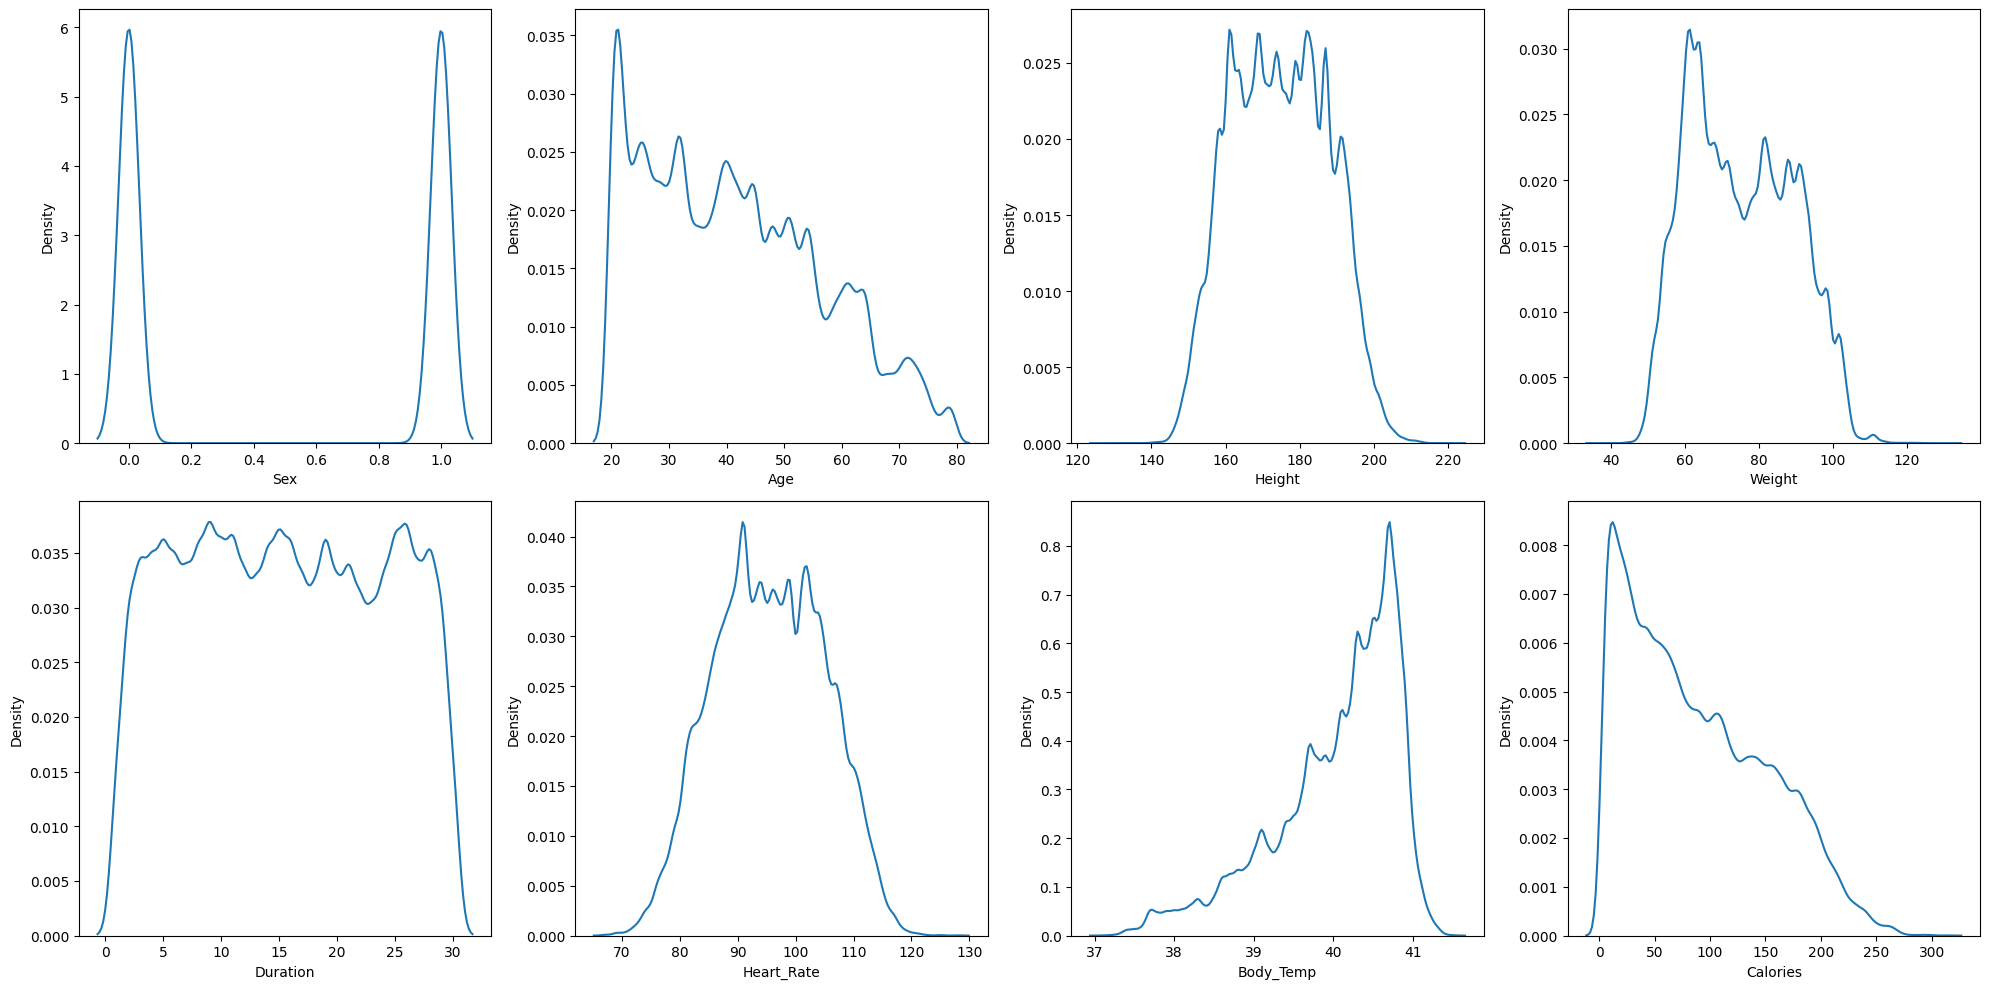

In [8]:
fig,ax=plt.subplots(2,4,figsize=(20,10))
ax=ax.flatten()
i=0
for col in df.columns:
    if col!='id':
        sns.kdeplot(data=df,x=col,ax=ax[i])
        i+=1
plt.tight_layout()
plt.show()

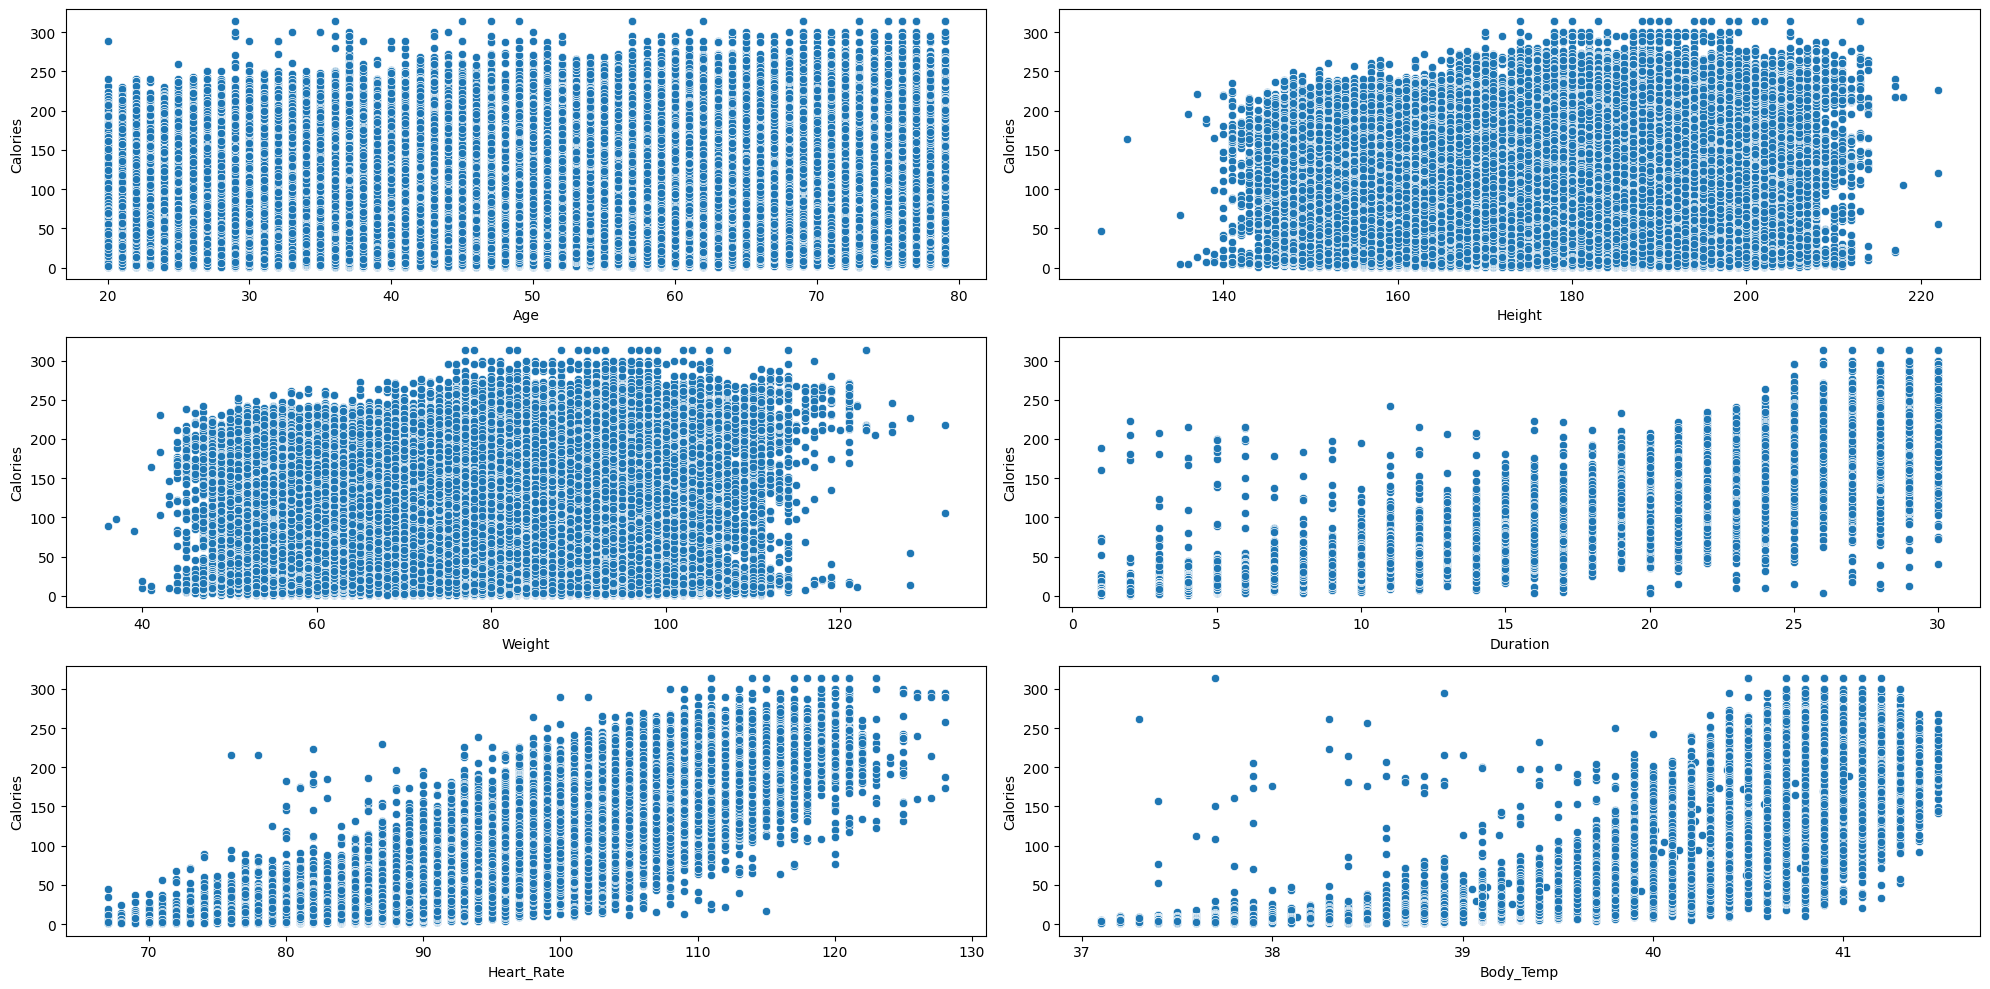

In [9]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
ax=ax.flatten()
i=0
cols = [col for col in df.columns if col not in ['id', 'Calories', 'Sex']]
for col in cols:
    sns.scatterplot(data=df,x=col,y='Calories',ax=ax[i])
    i+=1
plt.tight_layout()
plt.show()

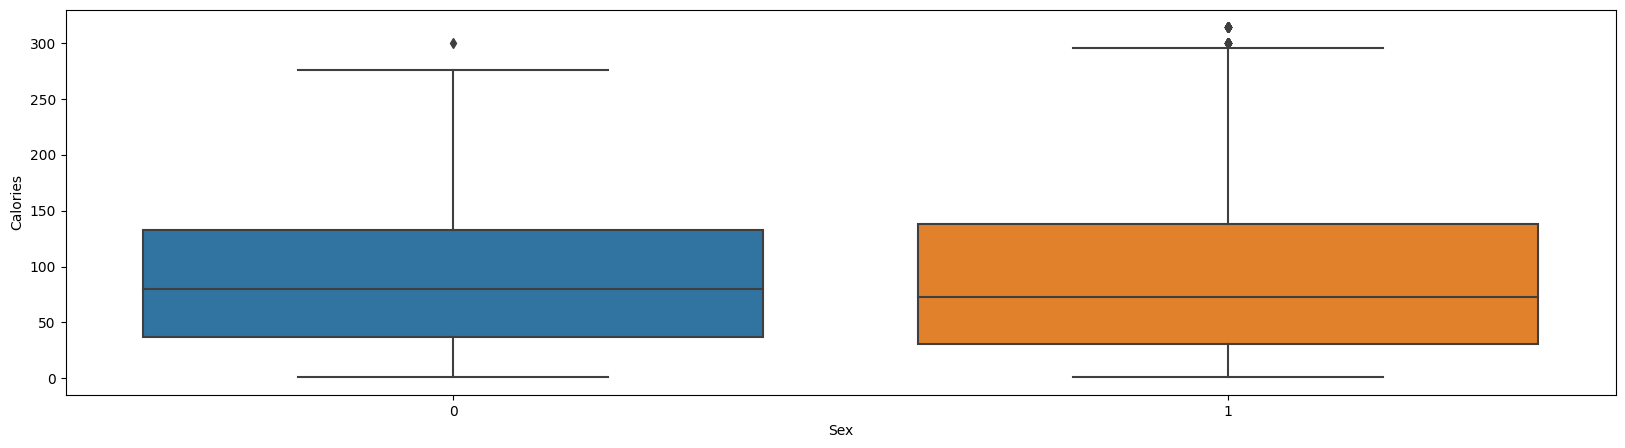

In [10]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,y='Calories',x='Sex')
plt.show()

# Feature Engineering 🪄

In [11]:
from sklearn.feature_selection import mutual_info_regression

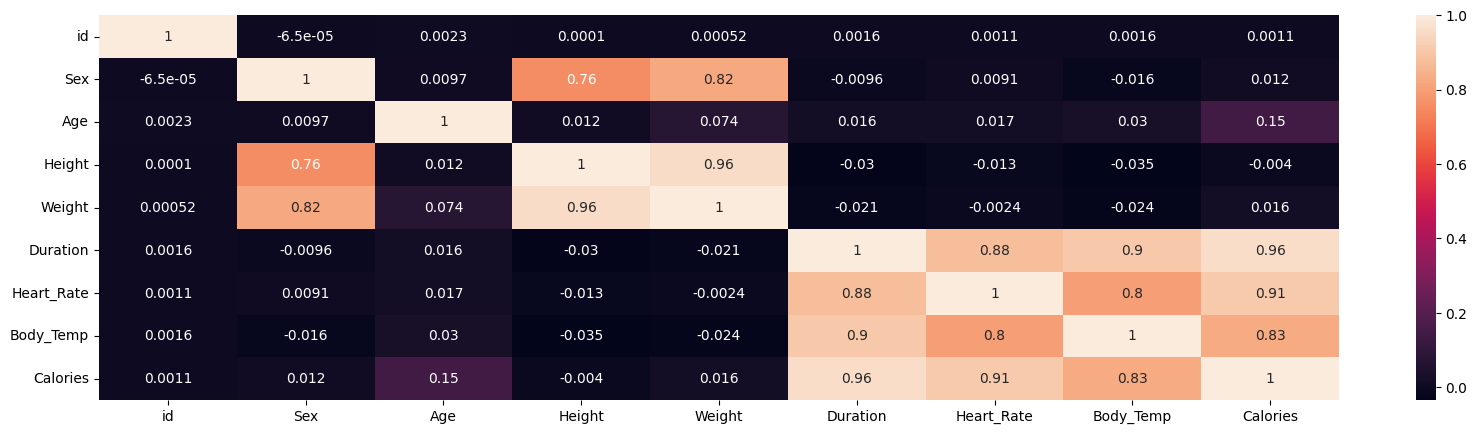

In [12]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

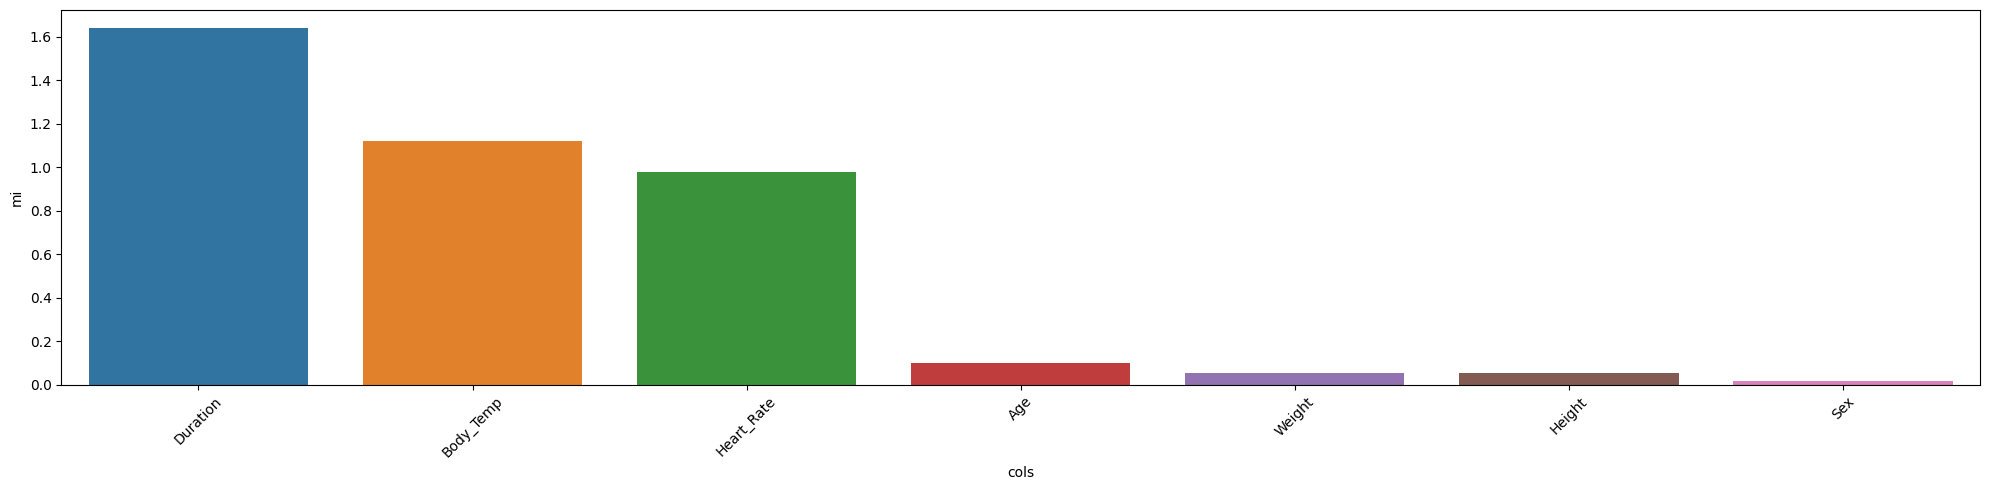

In [13]:
x=df.drop(columns=['id','Calories'])
y=df['Calories']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(by='mi',ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data=mi_df.sort_values(by='mi', ascending=False), x='cols', y='mi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
from itertools import combinations

cols = ['Duration', 'Heart_Rate', 'Body_Temp']
for feature in cols:
    df[f'{feature}_squared'] = df[feature] ** 2
    df[f'{feature}_cubed'] = df[feature] ** 3
    df[f'{feature}_log'] = np.log1p(df[feature])
    df[f'{feature}_sqrt'] = np.sqrt(df[feature])
    df[f'{feature}_inv'] = 1 / (df[feature] + 1e-6)  
for f1, f2 in combinations(cols, 2):
    df[f'{f1}_x_{f2}'] = df[f1] * df[f2]

for feature in cols:
    te[f'{feature}_squared'] = te[feature] ** 2
    te[f'{feature}_cubed'] = te[feature] ** 3
    te[f'{feature}_log'] = np.log1p(te[feature])
    te[f'{feature}_sqrt'] = np.sqrt(te[feature])
    te[f'{feature}_inv'] = 1 / (te[feature] + 1e-6)  
for f1, f2 in combinations(cols, 2):
    te[f'{f1}_x_{f2}'] = te[f1] * te[f2]

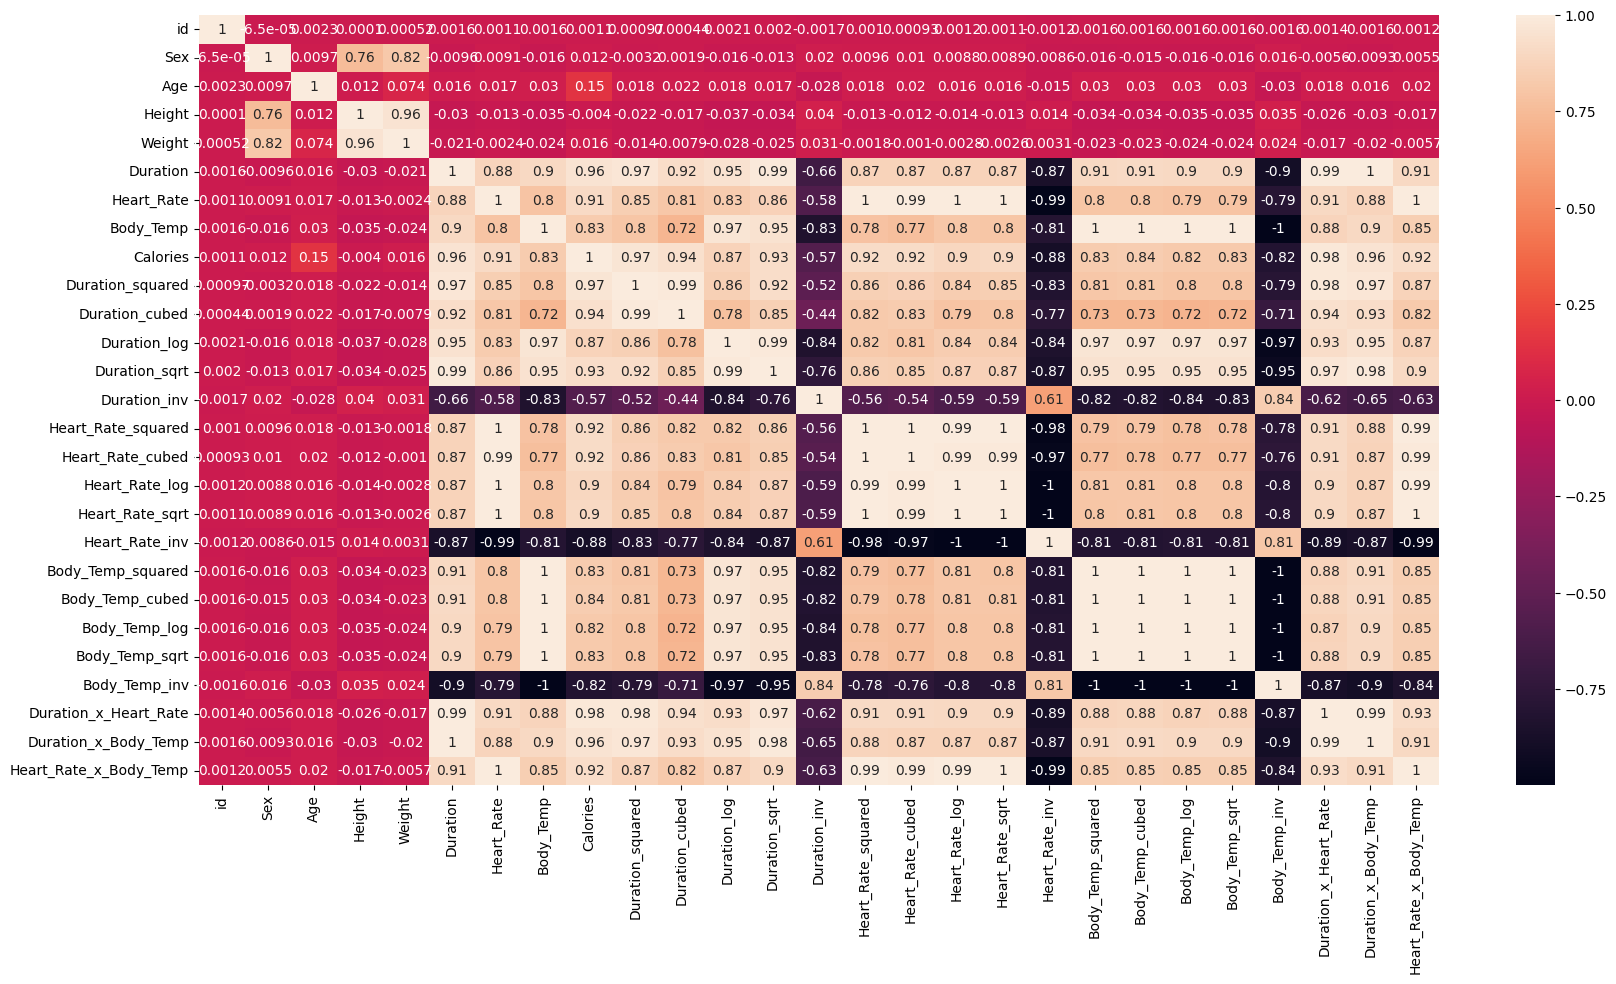

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

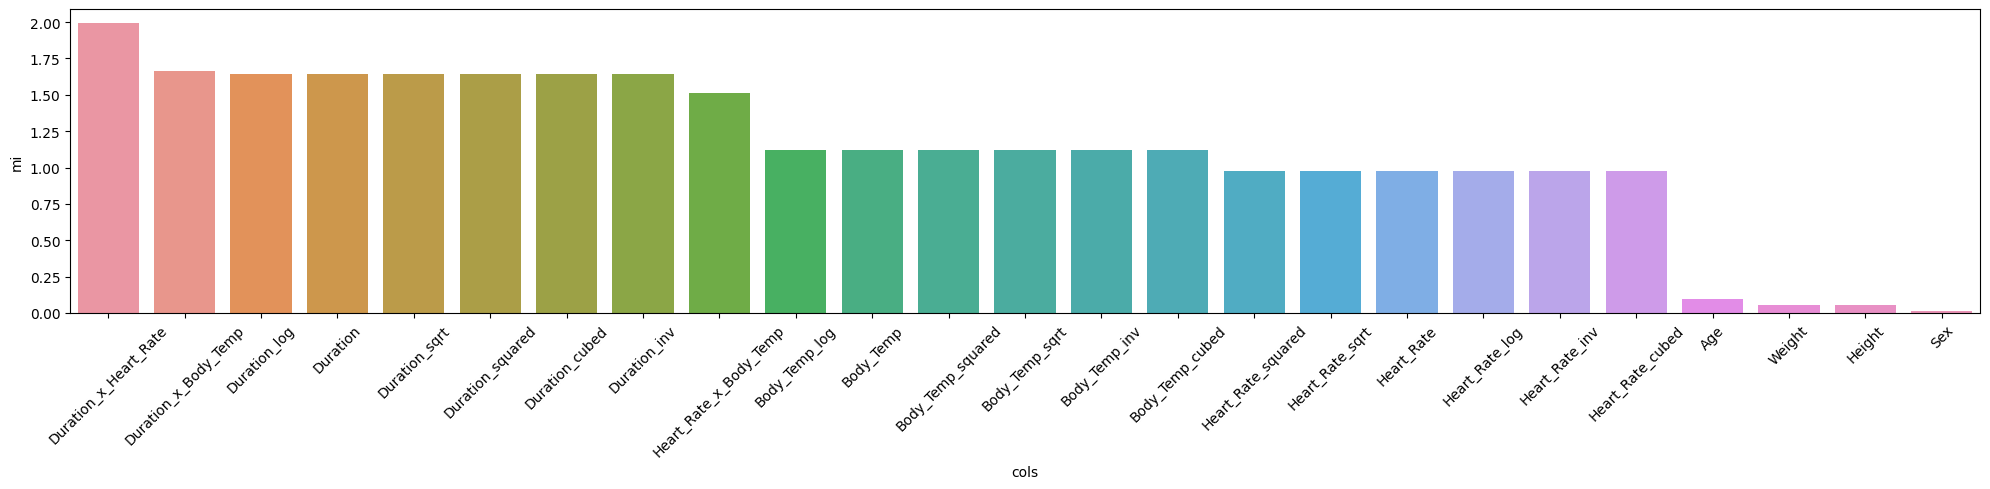

In [16]:
x=df.drop(columns=['id','Calories'])
y=df['Calories']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(by='mi',ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data=mi_df.sort_values(by='mi', ascending=False), x='cols', y='mi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Model

In [17]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [18]:
X = df.drop(columns=['id', 'Calories'])
y = np.log1p(df['Calories'])

def objective(trial):
    params = {
        'loss_function': 'RMSE',
        'iterations': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_seed': 42,
        'cat_features': [col for col in X.select_dtypes(include=['object']).columns],
        'task_type': 'GPU',
        'devices': '0'
    }
    
    model = CatBoostRegressor(**params)
    model.fit(X, y, verbose=False)
    val_rmse = model.best_score_['learn']['RMSE']
    return val_rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_params.update({
    'loss_function': 'RMSE',
    'iterations': 1000,
    'random_seed': 42,
    'cat_features': [col for col in X.select_dtypes(include=['object']).columns],
    'task_type': 'GPU',
    'devices': '0'
})

model = CatBoostRegressor(**best_params)
model.fit(X, y, verbose=False)

[I 2025-05-10 03:02:38,168] A new study created in memory with name: no-name-0acf3464-7cb9-427f-8c16-bb0111792da2
[I 2025-05-10 03:03:09,391] Trial 0 finished with value: 0.057344522020234566 and parameters: {'learning_rate': 0.044268797143528354, 'depth': 9, 'l2_leaf_reg': 8.252252390105957, 'bagging_temperature': 0.753902463369792, 'random_strength': 0.0008826756092354004, 'border_count': 180}. Best is trial 0 with value: 0.057344522020234566.
[I 2025-05-10 03:03:19,411] Trial 1 finished with value: 0.05950435470758982 and parameters: {'learning_rate': 0.011487419007913124, 'depth': 8, 'l2_leaf_reg': 2.9376022778576386e-07, 'bagging_temperature': 0.9634884552206238, 'random_strength': 0.001809807124113435, 'border_count': 211}. Best is trial 0 with value: 0.057344522020234566.
[I 2025-05-10 03:03:28,743] Trial 2 finished with value: 0.05648658579698369 and parameters: {'learning_rate': 0.046205579656149916, 'depth': 8, 'l2_leaf_reg': 1.538419480975276e-05, 'bagging_temperature': 0.90

# Prediction and Submission 🪄

In [19]:
log_preds = model.predict(te)
final_predictions = np.expm1(log_preds)
final_predictions = np.clip(final_predictions, 1, 314)

submission = pd.DataFrame({'id': tte['id'], 'Calories': final_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission saved to submission.csv")

Submission saved to submission.csv
